<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum%20Mandiri%207/PraktikumLinearRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pendahuluan
Notebook ini mendemonstrasikan proses end-to-end dalam membangun model Machine Learning menggunakan algoritma Regresi Linear Berganda (Multiple Linear Regression). Tujuannya adalah untuk memprediksi nilai 'N' (kemungkinan besar kadar Nitrogen) berdasarkan sekumpulan data fitur yang tampaknya berasal dari citra satelit (seperti iafe, b9, gamma0_vh, dll.).

Proses ini mencakup beberapa tahapan standar dalam data science, mulai dari memuat data, membersihkan data (preprocessing), memilih fitur, melatih model, hingga mengevaluasi kinerjanya.

Tujuan utama dari praktikum ini adalah:

Mempelajari cara memuat dan memeriksa (inspeksi) dataset menggunakan library pandas.

Melakukan pembersihan data (data cleaning) untuk menangani nilai yang hilang (missing values) dan tipe data yang tidak sesuai.

Memisahkan data menjadi variabel target (yang ingin diprediksi) dan variabel fitur (yang digunakan untuk memprediksi).

Membagi dataset menjadi data latih (training set) dan data uji (testing set).

Melatih model Regresi Linear menggunakan scikit-learn pada data latih.

Mengevaluasi performa model pada data uji menggunakan metrik Mean Squared Error (MSE) dan R-squared (R²).

Menganalisis hasil prediksi secara visual dan mendalam untuk memahami keakuratan model.

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

Tujuan: Memuat semua "alat" atau library Python yang diperlukan untuk analisis.

Penjelasan:

1. pandas: Digunakan untuk manipulasi data (memuat CSV, membuat DataFrame).
2. numpy: Digunakan untuk operasi numerik, terutama untuk menangani np.nan (Not a Number).

3. matplotlib.pyplot & seaborn: Digunakan untuk visualisasi data (membuat plot).

4. train_test_split: Fungsi dari scikit-learn untuk membagi data menjadi set latih dan uji.

5. LinearRegression: Ini adalah kelas model Machine Learning yang akan digunakan.

6. mean_squared_error & r2_score: Ini adalah metrik untuk mengukur seberapa baik kinerja model.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum Mandiri/data/dataset_satelit.csv')
df.head()

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541


Tujuan: Memasukkan data ke dalam program dan memahami karakteristik dasarnya.

Proses:

pd.read_csv(...): Membaca file dataset_satelit.csv dan menyimpannya dalam sebuah struktur tabel yang disebut DataFrame (df).

df.head(): Menampilkan 5 baris pertama untuk melihat gambaran awal data dan kolom-kolomnya (terlihat ada 34 kolom).


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

df.info(): Memberikan ringkasan teknis. Dari output ini, dua masalah teridentifikasi:

Kolom K memiliki 1 nilai hilang (hanya 593 non-null dari 594 data).

Kolom Mg memiliki tipe data object (teks), padahal seharusnya angka (float). Ini menandakan ada data kotor (bukan angka) di kolom tersebut.

In [ ]:
df.describe()

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


df.describe(): Menampilkan statistik dasar (rata-rata, min, max, dll.) untuk semua kolom numerik. Ini membantu memahami rentang nilai setiap fitur.

In [ ]:
# Konversi kolom mg ke numerik
df['Mg'] = pd.to_numeric(df['Mg'], errors='coerce')


Tujuan: Memperbaiki masalah yang ditemukan pada Tahap 2 agar data siap digunakan oleh model.

pd.to_numeric(..., errors='coerce'): Kode ini "memaksa" kolom Mg menjadi tipe numerik. errors='coerce' adalah perintah penting: jika ia menemukan nilai yang bukan angka (alasan tipe datanya object), ia akan mengubahnya menjadi NaN (nilai kosong).


In [ ]:
# Mengatasi Missing Values
df = df.fillna(df.median(numeric_only=True))

df.fillna(df.median(...)): Kode ini mengisi semua nilai NaN yang ada di DataFrame (termasuk yang ada di kolom K dan yang baru saja dibuat di Mg) dengan nilai median (nilai tengah) dari kolomnya masing-masing. Penggunaan median lebih dianjurkan daripada rata-rata (mean) jika data memiliki outlier (nilai ekstrem).

In [ ]:
# yVariabel target (Y)
y = df['N']

# Variabel Fitur (X)
X = df[['iafe', 'b9', 'gamma0_vh', 'b8', 'beta0_vh']]

print(f"Shape dari X : {X.shape}")
print(f"Shape dari y : {y.shape}")
print(f"\nFitur X : \n{X.head()}")
print(f"\nTarget y : \n{y.head()}")

Shape dari X : (594, 5)
Shape dari y : (594,)

Fitur X : 
       iafe      b9  gamma0_vh      b8  beta0_vh
0  35.41161  0.4753    0.05479  0.2930   0.07686
1  35.41510  0.4811    0.05699  0.2828   0.07993
2  35.41135  0.4981    0.04902  0.3166   0.06876
3  35.41583  0.4603    0.04448  0.3256   0.06238
4  35.41592  0.4655    0.04664  0.2918   0.06541

Target y : 
0    2.64
1    2.75
2    1.77
3    2.30
4    2.05
Name: N, dtype: float64


Tujuan: Menentukan apa yang ingin diprediksi (Target) dan data apa yang akan digunakan untuk memprediksi (Fitur).

y = df['N']: Variabel target (dependen), atau y, ditetapkan sebagai kolom 'N'. Inilah yang akan coba diprediksi oleh model.

X = df[['iafe', ...]]: Variabel fitur (independen), atau X, ditetapkan sebagai 5 kolom: iafe, b9, gamma0_vh, b8, dan beta0_vh. Model akan mencari pola hubungan antara 5 fitur ini untuk menebak nilai 'N'.


In [ ]:
# Split data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Jumlah data Training : {X_train.shape[0]}")
print(f"Jumlah data Testing : {X_test.shape[0]}")

Jumlah data Training : 475
Jumlah data Testing : 119


Tujuan: Membagi data menjadi dua set: satu untuk "belajar" (latih) dan satu untuk "ujian" (uji).

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

Tujuan: Melatih model untuk menemukan "rumus" prediksi.

model = LinearRegression(): Membuat objek model Regresi Linear yang masih "kosong".model.fit(X_train, y_train): Ini adalah inti dari machine learning. Model akan menganalisis data X_train dan y_train untuk menemukan formula matematis (dalam bentuk $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_5x_5$) yang paling pas untuk menggambarkan hubungan antara 5 fitur X dan target y.

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (Akurasi): {r2:.2f}")

Mean Squared Error: 0.07
R-squared (Akurasi): 0.55


Tujuan: Mengukur seberapa baik model yang sudah dilatih dalam memprediksi data baru yang belum pernah dilihat sebelumnya (data uji).

model.predict(X_test): Model menggunakan "rumus" yang telah dipelajarinya untuk membuat tebakan (prediksi) nilai 'N' (y_pred) berdasarkan data X_test.

mean_squared_error(...): Menghitung MSE (0.07). Ini adalah rata-rata dari kuadrat selisih antara nilai aktual dan prediksi. Semakin kecil nilainya, semakin baik.

r2_score(...): Menghitung R-squared (0.55). Ini adalah metrik yang paling sering digunakan untuk regresi.

Nilai 0.55 (atau 55%) berarti 55% variasi atau keragaman data 'N' dapat dijelaskan oleh 5 fitur yang digunakan (iafe, b9, gamma0_vh, b8, beta0_vh).

Ini adalah skor yang "sedang". Tidak terlalu buruk, tetapi juga tidak terlalu tinggi, yang menunjukkan bahwa masih ada 45% variasi 'N' yang tidak bisa dijelaskan oleh model ini.

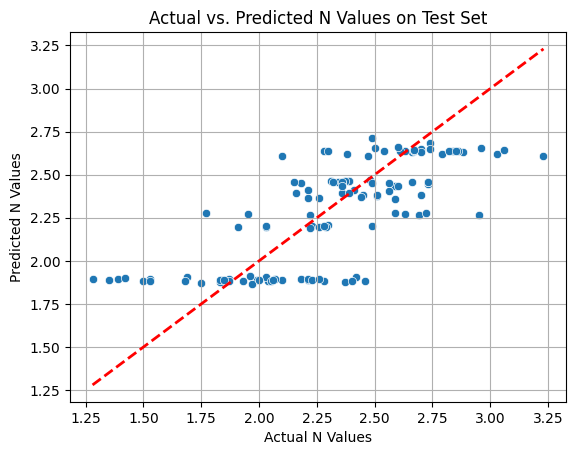

In [ ]:
import matplotlib.pyplot as plt
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual N Values')
plt.ylabel('Predicted N Values')
plt.title('Actual vs. Predicted N Values on Test Set')
plt.grid(True)
plt.show()

sns.scatterplot(...): Membuat visualisasi (Sel 11) untuk membandingkan nilai Aktual (sumbu x) dengan nilai Prediksi (sumbu y).

plt.plot(..., 'r--'): Menambahkan garis putus-putus merah. Ini adalah garis "ideal" di mana prediksi = aktual. Semakin dekat titik-titik biru ke garis merah, semakin akurat prediksinya. Plot ini secara visual mengkonfirmasi skor R² 0.55; ada tren positif, tetapi titik-titiknya cukup tersebar.

In [ ]:
# Pengujian model dengan data testing
# Prediksi nilai N
y_pred_test = model.predict(X_test)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "iafe": X_test["iafe"].to_numpy(),
    "b9": X_test["b9"].to_numpy(),
    "gamma0_vh": X_test["gamma0_vh"].to_numpy(),
    "b8": X_test["b8"].to_numpy(),
    "beta0_vh": X_test["beta0_vh"].to_numpy(),
    "Aktual N": y_test.to_numpy(),
    "Prediksi N": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error"] = hasil["Prediksi N"] - hasil["Aktual N"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0-100
denom = hasil["Aktual N"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil.head()

,iafe,b9,gamma0_vh,b8,beta0_vh,Aktual N,Prediksi N,Selisih error,Akurasi (%)
0,35.50120,0.5792,0.04919,0.3274,0.06878,2.69,2.267716,-0.422284,84.301712
1,39.02545,0.4555,0.07074,0.4064,0.08715,2.28,1.884999,-0.395001,82.675385
2,33.69036,1.5794,0.06466,0.4304,0.09674,2.48,2.468283,-0.011717,99.527539
3,33.71030,1.5794,0.05928,0.4628,0.08862,2.66,2.459315,-0.200685,92.455439
4,39.07763,0.4468,0.05788,0.4016,0.07118,2.46,1.881447,-0.578553,76.481568


Tujuan: Menganalisis kinerja model pada level per-baris data, bukan hanya secara agregat (total).

Sebuah DataFrame baru (hasil) dibuat untuk menampilkan nilai fitur (X_test), nilai Aktual N (y_test), dan Prediksi N (y_pred_test) secara berdampingan.Selisih error: Dihitung selisih mentah antara prediksi dan aktual. Nilai negatif berarti under-predict (tebakan terlalu rendah), positif berarti over-predict (tebakan terlalu tinggi).Akurasi (%): Dihitung metrik kustom yang mirip dengan kebalikan dari MAPE (Mean Absolute Percentage Error). Rumusnya $100 \times (1 - \frac{|\text{Prediksi} - \text{Aktual}|}{\text{Aktual}})$. Ini memberikan gambaran akurasi yang lebih intuitif untuk setiap baris prediksi.

Kesimpulan
Praktikum ini berhasil membangun model regresi linear untuk memprediksi nilai 'N' dengan 5 fitur satelit. Model ini menunjukkan kinerja yang cukup (R-squared = 0.55), yang berarti model ini lebih baik daripada hanya menebak dengan nilai rata-rata, tetapi masih memiliki ruang besar untuk perbaikan.

Langkah-langkah penting yang dipelajari meliputi pembersihan data (mengatasi tipe data object dan NaN), pentingnya memisahkan data latih/uji, serta cara mengevaluasi model menggunakan metrik MSE, R², dan visualisasi scatter plot. Analisis mendalam di sel terakhir juga menunjukkan cara menghitung error dan akurasi per baris data.

In [ ]:
# Jalankan ini setelah sel 6 (setelah data bersih)
correlation_matrix = df.corr()
print(correlation_matrix['N'].sort_values(ascending=False))

N            1.000000
Lattitude    0.742794
P            0.643212
b9           0.535288
b8a          0.528105
b8           0.526838
Sigma_VH     0.503636
Sigma_VV     0.454871
Mn           0.383059
b5           0.376916
Fe           0.338775
b1           0.312106
Zn           0.186446
B            0.122336
b12          0.098796
b2           0.064155
No           0.057689
Ca           0.035696
Cu           0.028677
Mg           0.027793
b4          -0.126046
b3          -0.137538
K           -0.138342
b7          -0.333109
beta0_vv    -0.424251
b11         -0.462297
b6          -0.509165
gamma0_vv   -0.517893
beta0_vh    -0.520638
gamma0_vh   -0.540866
plia        -0.592965
lia         -0.593177
iafe        -0.593590
Longitude   -0.695291
Name: N, dtype: float64
